<h1><center>Report 9</center></h1>
<h3><center>Jiachen Tian</center><h3>

# Introduction
Big updates on both interface and algorithm. Add glint detection to the algorithms as well as add one optimization to KCF tracker. 

# Setup
Setup path to include our files. import them. use `autoreload` to get changes in as they are made. 

In [51]:
import os
import sys
import cv2
from matplotlib import pyplot as plt

# load our code
sys.path.insert(0, os.path.abspath('../'))
from preProcess import preprocess
from tracker import set_tracker, TrackedFrame, Box, Circle
from optimization import fast_tracker
from HTimp import HTimp
# specific to jupyter notebook
from jupyter_help import cvplt, cvplt_sub
#Import image processing function from optimization
from optimization import fast_tracker

# load any changes as we make them
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Interface Update
Get the User-interface
1. Enabling user to crop out pupil and glint based on which checkbox is selected.
2. Enabling demo of checkbox size

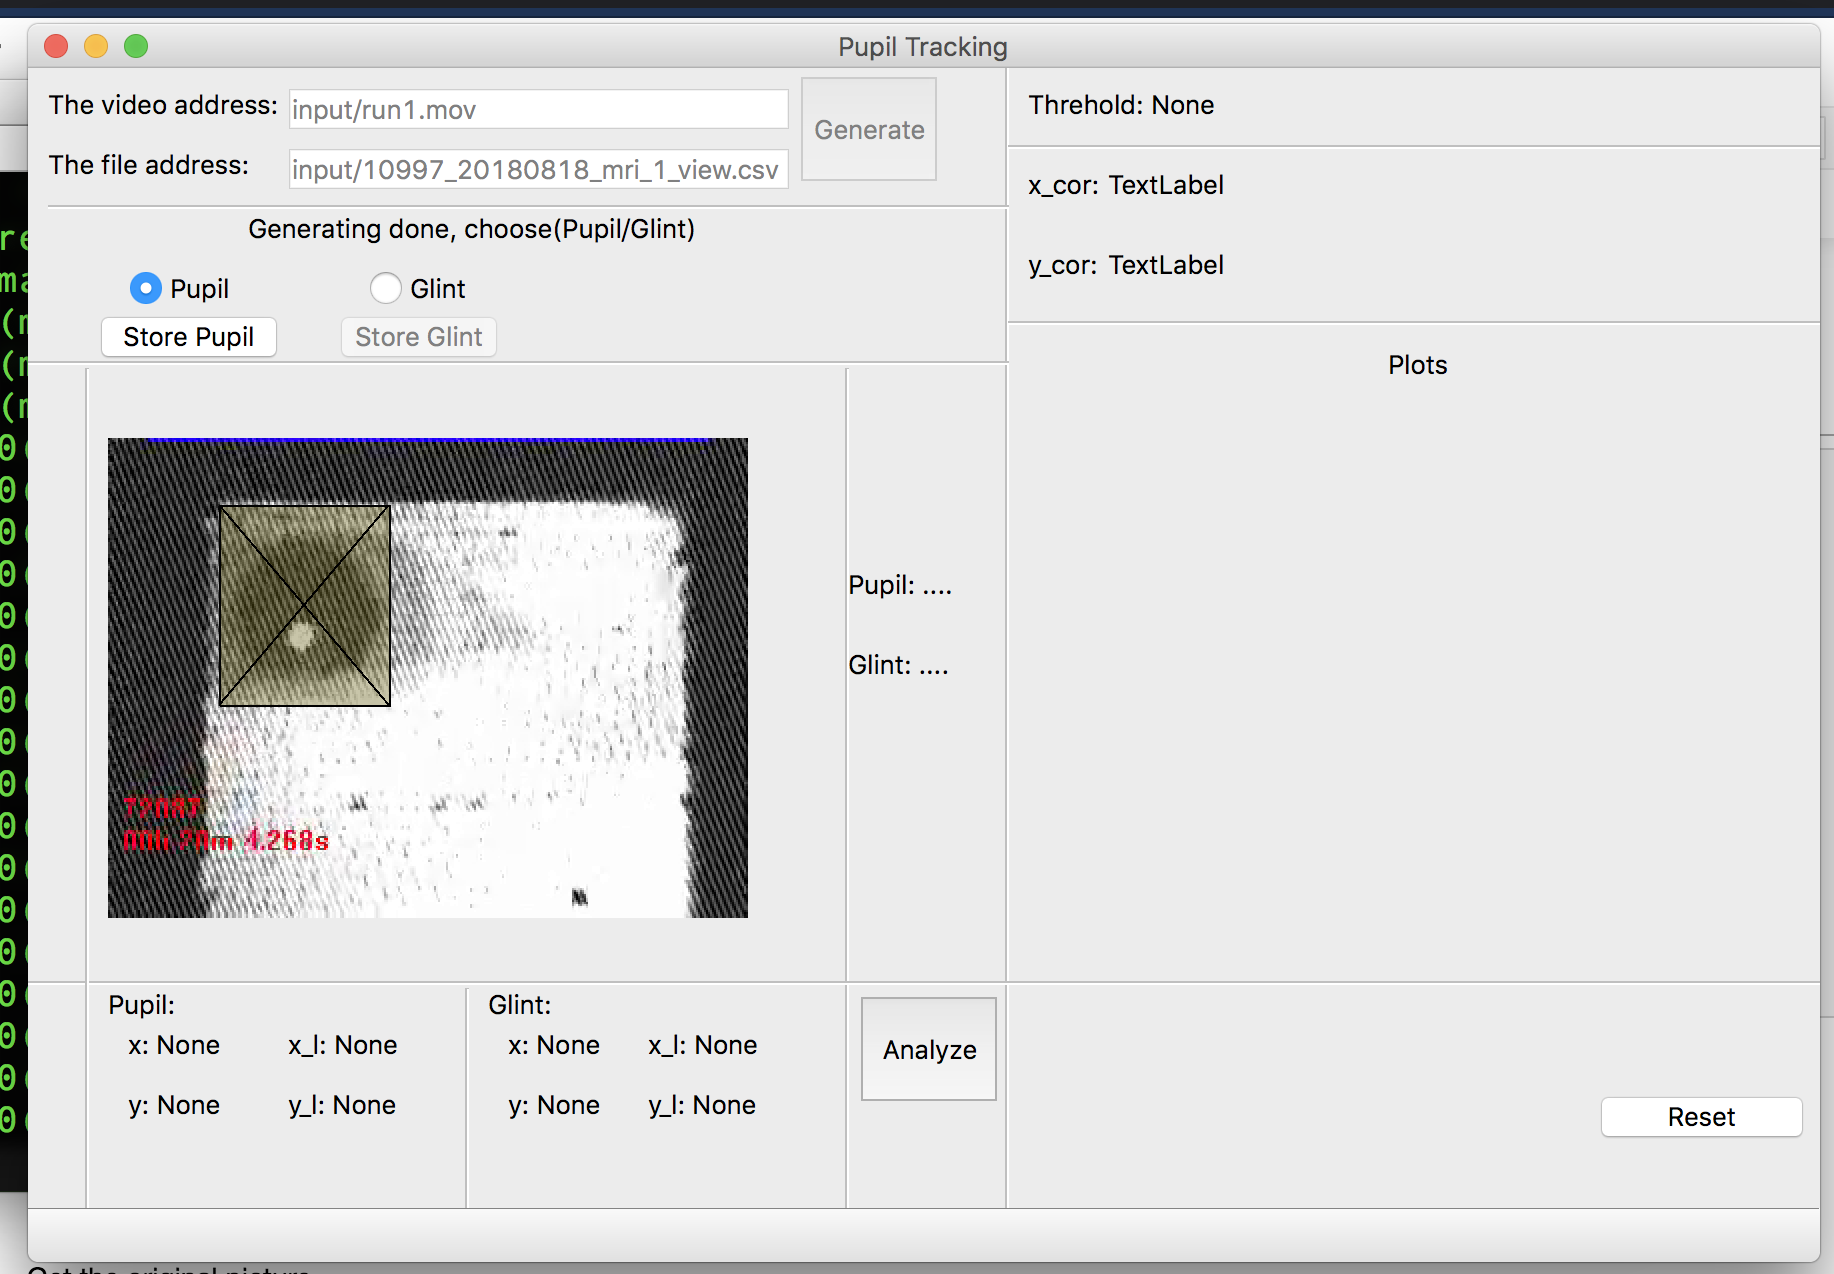

# Tracker Update
1. Added fast Hough Transform to the tracker using the predicted threshold values.

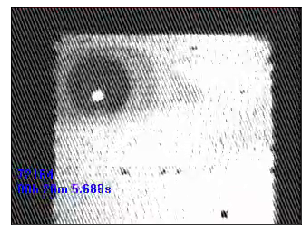

In [41]:
#Initialize variables(Predicted varibled)
blur = (16, 16)
canny = (40, 50)
threshold = (105, 105)

#Load an arbitrary frame into the file
vid_fname = "../input/run1.mov" # path relative to this document 
frame_number = 100
vs = cv2.VideoCapture(vid_fname) 
vs.set(1, frame_number) 
frame = vs.read()[1]
cvplt(frame)

# Fit a KCF tracker

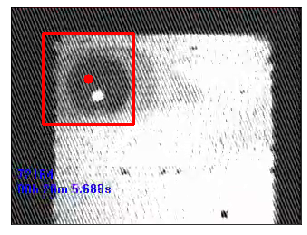

In [42]:
# intiail bounding box 
bbox = (35, 30, 100, 100) 
init_box = Box(bbox)
frame_box = frame.copy()
init_box.draw_box(frame_box)
cvplt(frame_box)
#We could see that it's not precise at all...

# Fit Fast Hough Transform to the image

[91.5 85.5 32.1]


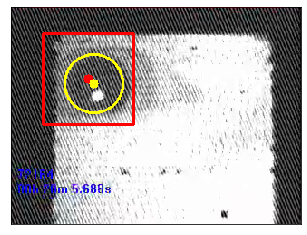

In [60]:
#Initialize the fast Hough Transform algorithm
HT = fast_tracker(frame, threshold, blur, canny)
#Print the edge image out and see how it looks 
edged = HT.prepossing()
#Fit a circle onto it
circle = HTimp(edged).get()[0][0]
init_circle = Circle(circle)
init_circle.draw_circle(frame_box)
cvplt(frame_box)

# Analysis
As shown on the yellow circle, KCF tracker narrows the Hough transform search area and at the same time. Hough transform complements KCF tracker to get more precise results.

# Conclusion
Although the tracker becomes more precise with the addition of Hough Transform, it's not enough. However, after testing all the available pupil detection algorithm out there, none of which quite satisfies the expectations. Therefore, a self-developed eye-tracking algorithm is underway.